# Research Question 2

### Does having a stem degree cause a candidate to win the primary election within the Democratic Party? 

Outcome: Estimate the causal effect of having STEM degree on the result of the primary election within the Democratic Party.
Units: individual candidates running for office within specific districts or states.
Confounders (if applicable): race, Veteran, LGBTQ, is_female, state, district, Partisan Lean
Causal Inference Technique: Propensity Score Matching approach for causal inference. Due to limitations with propensity scores due to unconfoundedness we may use a simple difference of means as well.

In [ ]:
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches

In [ ]:
dem = pd.read_csv('dem_candidates.csv')
dem

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-35.330002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
807,Janice Hagerman,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
808,Paul Davis,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN
809,Richard Ojeda,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-47.480000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN


# Data Transformation

### Add a column for gender (is_female)

We believe being female will be an important confounding variable with having or not having a stem degree so we used a supplementary data set that includes gender data for candidates. Unfortunately the data set does not have all candidates so we used a threshold matching approach which is not 100% accurate but it is very close. For the final submission we will likely match with additional data so that this is 100% accurate.

In [ ]:
# female list from other source
# https://cawp.rutgers.edu/2018-women-primary-candidates-us-congress-and-statewide-elected-executive
female = pd.read_csv('/work/Gender_2.csv')

In [ ]:
# match female in list with dem dataset
matching_threshold = 0.75
dem['SimilarityRatio'] = dem['Candidate'].apply(lambda x: max(difflib.SequenceMatcher(None, x, female_name).ratio() for female_name in female['Name']))
dem['is_female'] = dem['SimilarityRatio'] > matching_threshold

###  Add columns transforming categorical values into binary representation

(some of the visualizations use these transformations): 
- LGBTQ: (No, Yes) -> (0,1)
- Race (Nonwhite, White) -> (0,1)
- Veteran (No, Yes) -> (0,1)
- is_female (False, True) -> (0,1)
- Won Primary (No, Yes) -> (0,1)

In [ ]:
binary_mapping = {'No': 0, 'Yes': 1}
race_mapping = {'Nonwhite': 0, 'White': 1}
gender_mapping = {False: 0, True: 1}

# Create a new column 'LGBTQ?_bin' and map with binary value
dem['LGBTQ?_bin'] = dem['LGBTQ?'].map(binary_mapping)
dem['Race_bin'] = dem['Race'].map(race_mapping)
dem['Veteran_bin'] = dem['Veteran?'].map(binary_mapping)
dem['female_bin'] = dem['is_female'].map(gender_mapping)
dem['Won Primary_bin'] = dem['Won Primary'].map(binary_mapping)
dem['STEM Numeric'] = dem['STEM?'].map(binary_mapping)
dem

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,VoteVets Endorsed?,No Labels Support?,SimilarityRatio,is_female,LGBTQ?_bin,Race_bin,Veteran_bin,female_bin,Won Primary_bin,STEM Numeric
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,0.450000,False,0.0,0.0,1.0,0,0.0,0.0
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,0.571429,False,1.0,1.0,0.0,0,0.0,0.0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,0.461538,False,0.0,1.0,1.0,0,0.0,0.0
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,0.545455,False,0.0,0.0,1.0,0,0.0,0.0
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,NaN,NaN,1.000000,True,0.0,1.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,WV,U.S. House West Virginia District 2,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-35.330002,...,No,NaN,0.666667,False,0.0,1.0,0.0,0,1.0,0.0
807,Janice Hagerman,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,No,NaN,0.620690,False,0.0,1.0,0.0,0,0.0,0.0
808,Paul Davis,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,No,NaN,0.640000,False,0.0,1.0,0.0,0,0.0,0.0
809,Richard Ojeda,WV,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-47.480000,...,Yes,NaN,0.615385,False,0.0,0.0,1.0,0,1.0,0.0


### Add latitude and longitude data for states

we do not currently have location as a confounding variable but we are adding state latitude and longitude data to visualize the distribution of candidates with stem degrees to see if we should get more precise location data. 

In [ ]:
# Mapping of state abbreviations to full names
state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

# Map state abbreviations to full names
dem['State'] = dem['State'].map(state_mapping)

state_capitals = pd.read_csv('us-state-capitals.csv')
state_capitals.rename(columns={'name': 'State'}, inplace=True)

dem = dem.merge(state_capitals[['State', 'latitude', 'longitude']], on='State', how='left')

# Drop rows where 'STEM?' is NaN
dem = dem.dropna(subset=['STEM?'])

# Apply jitter to the longitude and latitude to avoid overlap
# Adjust the scale of jitter as needed
jitter_strength = 0.8
dem['longitude_jitter'] = dem['longitude'] + np.random.uniform(-jitter_strength, jitter_strength, dem.shape[0])
dem['latitude_jitter'] = dem['latitude'] + np.random.uniform(-jitter_strength, jitter_strength, dem.shape[0])

# EDA Visualizations

### Figure 1

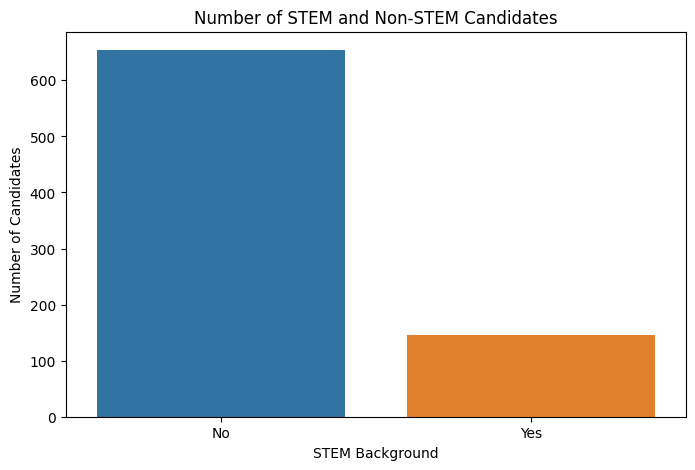

In [ ]:
# Visualization 1: Number of STEM and Non-STEM Candidates
plt.figure(figsize=(8, 5))
sns.countplot(x='STEM?', data=dem)
plt.title('Number of STEM and Non-STEM Candidates')
plt.ylabel('Number of Candidates')
plt.xlabel('STEM Background')
plt.show()

We start with a simple visual of the proportion of candidates with and without a stem degree. There are significantly more candidates without a STEM degree (654) than with one (146). This indicates that candidates with STEM backgrounds are less common in this dataset, which could be reflective of broader trends in the educational background of political candidates.

### Figure 2

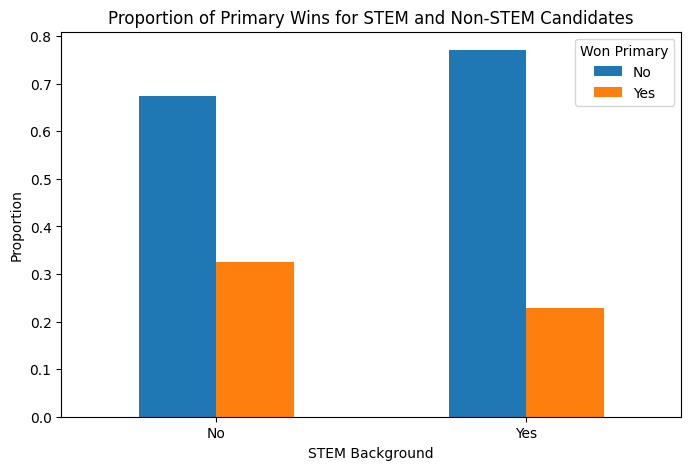

In [ ]:
# Visualization 2: Proportion of Primary Wins for STEM and Non-STEM Candidates
stem_win_rate = dem.groupby('STEM?')['Won Primary'].value_counts(normalize=True).unstack()
stem_win_rate.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title('Proportion of Primary Wins for STEM and Non-STEM Candidates')
plt.ylabel('Proportion')
plt.xlabel('STEM Background')
plt.xticks(rotation=0)
plt.legend(title='Won Primary')
plt.show()

This bar chart visualization contrasts the proportion of primary wins between candidates with and without STEM backgrounds. It clearly shows that a higher proportion of non-STEM candidates win their primaries compared to STEM candidates. The primary win rate data suggest that having a STEM degree might not be a significant advantage in primary elections, and may even be associated with a lower success rate. This could imply that other factors might play a more substantial role in primary outcomes. The relevance to the research question is direct: it illustrates the outcome (primary wins) in relation to the key independent variable (STEM background), thereby providing a visual basis for assessing the potential impact of having a STEM degree on primary election results. 

### Figure 3

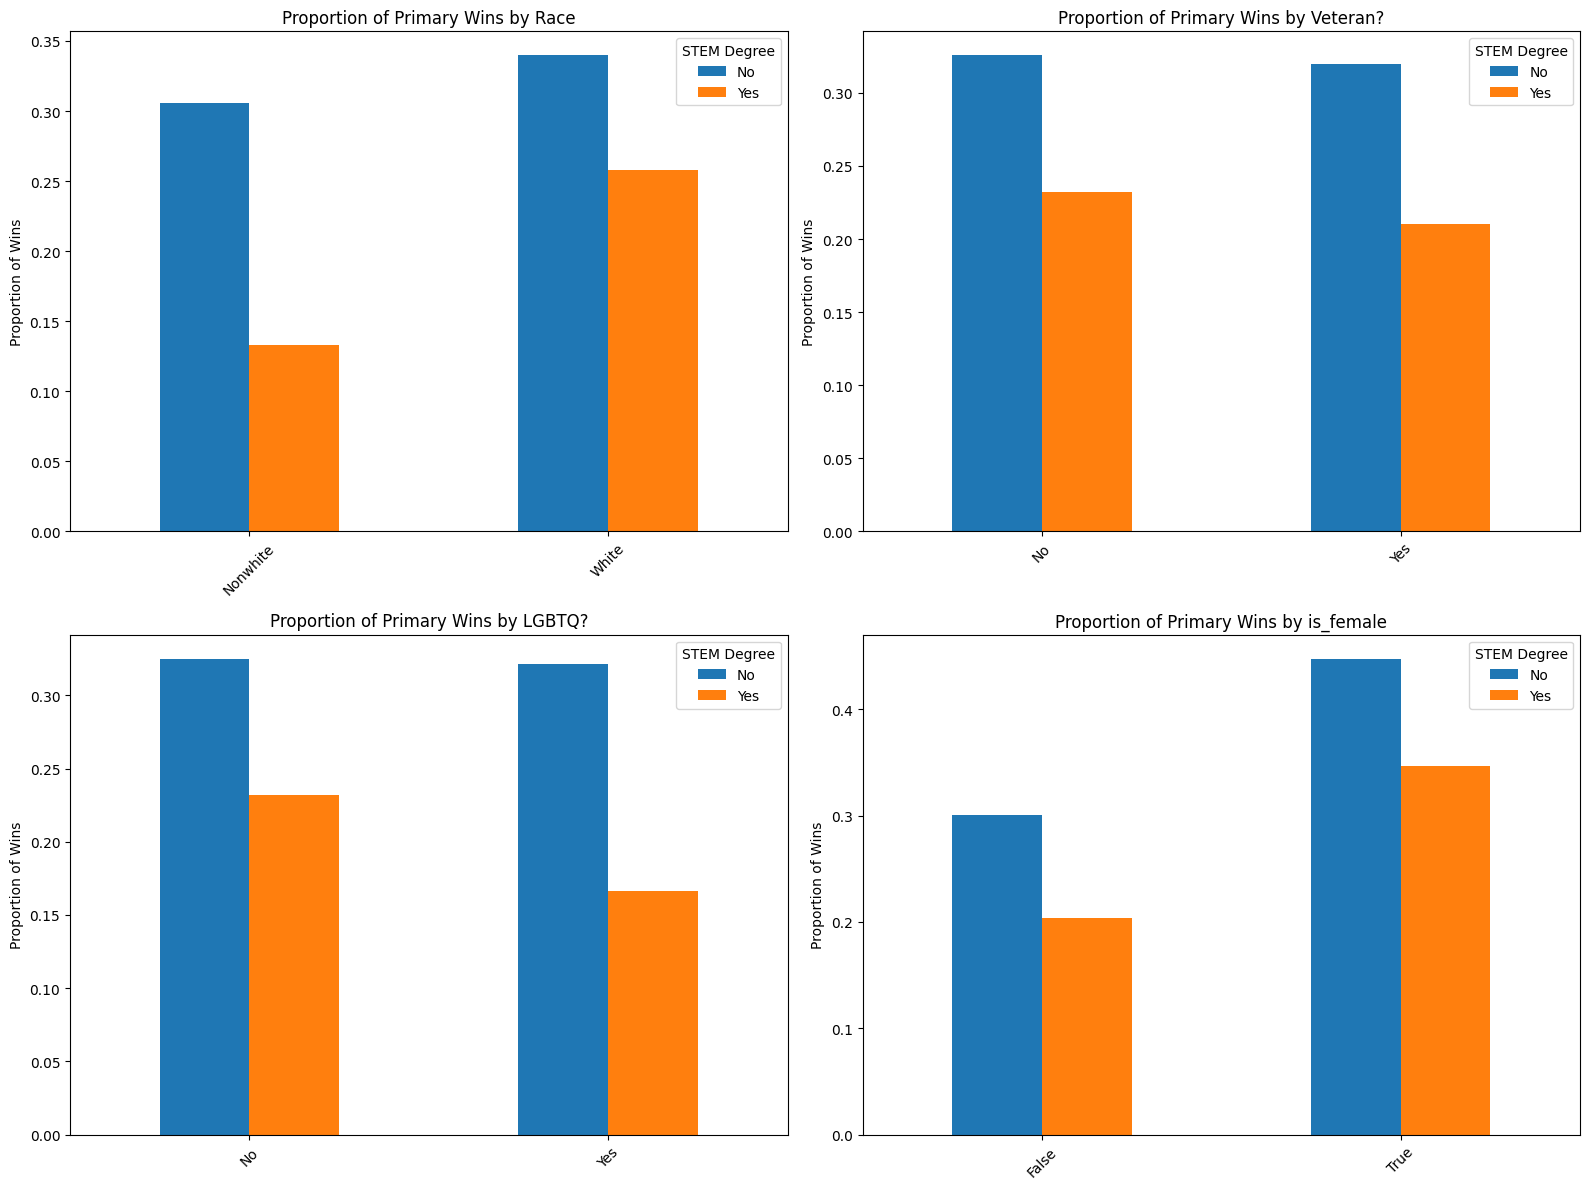

In [ ]:
# List of binary confounders for facet plot
binary_confounders = ['Race', 'Veteran?', 'LGBTQ?', 'is_female']

# Plotting each confounder's proportion of primary wins in separate subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()  # Flattening the axes array for easy iteration

for i, confounder in enumerate(binary_confounders):
    # Calculate the proportion of primary wins by confounder and STEM status
    win_rate = dem.groupby([confounder, 'STEM?'])['Won Primary_bin'].mean().unstack()
    win_rate.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'])  # Using distinct colors for clarity
    
    # Setting titles and labels for each subplot
    axes[i].set_title(f'Proportion of Primary Wins by {confounder}')
    axes[i].set_ylabel('Proportion of Wins')
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(win_rate.index, rotation=45)
    axes[i].legend(title='STEM Degree', loc='upper right')

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()

Veteran Status: Candidates with a veteran status who do not have a STEM degree have a higher proportion of primary wins compared to non-veterans with STEM degrees. This could suggest that veteran status may have a more substantial influence on primary election outcomes than having a STEM degree.

Gender: Female candidates with STEM degrees have a lower proportion of wins compared to male candidates with STEM degrees. This might indicate that gender plays a role in primary wins, potentially intersecting with the impact of a STEM background.

LGBTQ Status: Non-LGBTQ candidates with STEM degrees show a lower win rate compared to their LGBTQ counterparts with STEM degrees. This indicates that within the LGBTQ community, having a STEM degree may not significantly affect the chances of winning a primary.

Race: Nonwhite candidates with STEM degrees have a lower win rate compared to white candidates with STEM degrees. Race seems to be a significant factor, possibly more so than having a STEM degree.

These visualizations are relevant to the research question as they highlight the intersectionality of demographic factors with STEM qualifications in primary elections. They suggest that while having a STEM degree may influence primary outcomes, it is not the only determining factor; veteran status, gender, LGBTQ status, and race all appear to have an impact. These observations are crucial for motivating the research question by showing that the effect of a STEM degree on election outcomes is complex and multifaceted. They also suggest a potential answer: that a STEM degree's influence on primary success is moderated by other candidate confounders, which warrants a deeper causal analysis.

### Figure 4

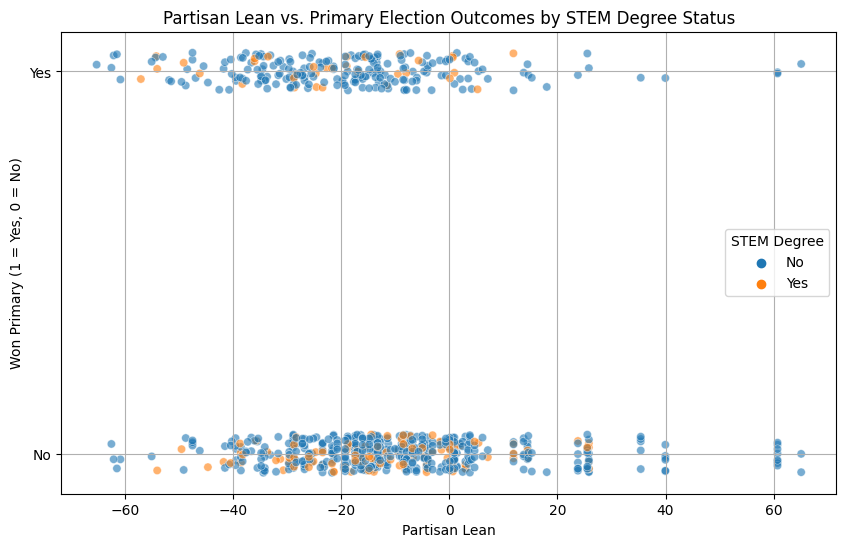

In [ ]:
# Add a small amount of random "jitter" to the 'Won Primary Numeric' column to separate points visually
dem['Won Primary Jittered'] = dem['Won Primary_bin'] + (np.random.rand(len(dem)) - 0.5) * 0.1

# Creating the scatter plot with jitter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Partisan Lean', y='Won Primary Jittered', hue='STEM?', data=dem, alpha=0.6)
plt.title('Partisan Lean vs. Primary Election Outcomes by STEM Degree Status')
plt.xlabel('Partisan Lean')
plt.ylabel('Won Primary (1 = Yes, 0 = No)')
plt.yticks([0, 1], ['No', 'Yes'])  # Setting the y-axis ticks to correspond to No and Yes
plt.legend(title='STEM Degree')
plt.grid(True)  # Adding a grid for better readability
plt.show()

The scatter plot visualizes the relationship between partisan lean and primary election outcomes by STEM degree status. There's a visible trend where candidates without STEM degrees tend to win primaries across a wider range of partisan leans compared to those with STEM degrees. Notably, both groups have winners in districts with varying partisan leans, but there's no clear pattern indicating that STEM degree holders are more successful in more or less partisan districts. The visualization is relevant to the research question as it explores whether the partisan lean of a district interacts with the STEM background of candidates to affect primary outcomes. It suggests that while STEM status may have some impact, the partisan lean of the district does not show a distinct pattern that favors STEM or non-STEM candidates consistently, indicating the complexity of factors influencing primary wins.

### Figure 5

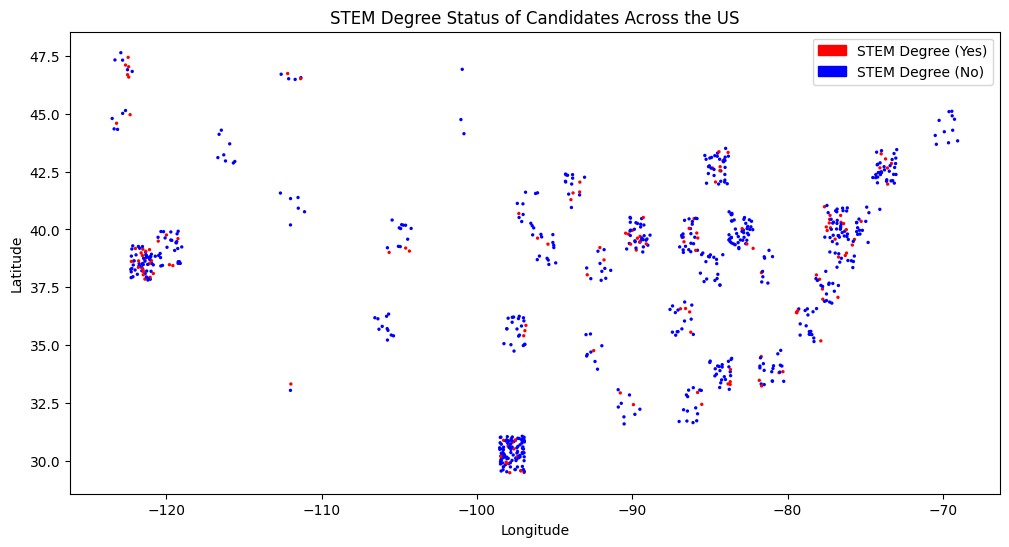

In [ ]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors: red for STEM, blue for non-STEM
colors = np.where(dem['STEM Numeric'] == 1, 'red', 'blue')

# Plot each candidate based on their jittered latitude and longitude
scatter = ax.scatter(dem['longitude_jitter'], dem['latitude_jitter'], c=colors, alpha=1, s=2)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('STEM Degree Status of Candidates Across the US')

# Optional: Create a legend
yes_patch = mpatches.Patch(color='red', label='STEM Degree (Yes)')
no_patch = mpatches.Patch(color='blue', label='STEM Degree (No)')
ax.legend(handles=[yes_patch, no_patch])

# Show the plot
plt.show()

The map visualization showcases the geographic spread of candidates with and without STEM degrees across the mainland United States. The points are color-coded, with red representing candidates with STEM degrees and blue for those without. The jitter has helped to distinguish between candidates in more populated areas, allowing for a clearer view of the distribution. There is no immediately apparent geographic clustering of STEM candidates, suggesting that they are distributed throughout the country rather than concentrated in specific regions known for technology or science. This visualization underlines the research question's premise by displaying the geographic diversity of candidates' educational backgrounds. It suggests that STEM qualifications are not confined to specific areas, potentially widening the scope of analysis to consider local district factors that may influence the success of STEM candidates in primaries.

# Causal Inference

Causal Inference
Formulate a causal question, clearly defining the treatment, control, and units (people, states, months, etc.). Use one of the techniques you learned in class to answer the question, clearly stating and justifying any and all assumptions you make.

### Methods

Treatment and Outcome variables: We are trying to define whether having a STEM degree will affect the chance that people will win the primary election within the Democratic Party. Hence, in this study, the treatment variable is the possession of a STEM degree, and the outcome variable is the success of individuals in winning the election. 

Confounders: Based on the domain expertise, the potential confounders we think may correlated with treatment and outcome are Demographic Factors, Geographic Location, financial standing, and Campaign Funding.

Demographic Factors:  Age, gender, ethnicity, and other demographic variables may be associated with having a STEM degree and also influence electoral outcomes.

Geographic Location: The region a candidate is running in could impact their chances of success and may be associated with STEM education. California is one of the states having the highest proportion of students pursuing STEM degree.

Financial standing: Financial standing plays a role in supporting individuals pursuing STEM degrees, particularly when they come from families with high financial status. The backing of family resources can potentially contribute to electoral success by providing financial support during election campaigns.

Campaign Funding: The amount of funding a candidate receives can impact the success of their campaign. Candidates with a STEM degree may have different funding patterns compared to those without.

Due to the limitation of the dataset, we are able to collect and include information regarding the gender, state, race, Veteran, LGBTQ, state, district, Partisan Lean of each candidate.

Method: We assume the unconfoundedness and use the Inverse Propensity Score weighting to adjust confounders in this observational study. 
1. Use Logistic regression to estimate the propensity scores, which represent the probability of having a STEM degree given the observed confounding variables
2.  Use inverse propensity score weighting to assign weights to each observation based on the inverse of its propensity score. IPW gives more weight to individuals whose observed characteristics are less common among individuals with the same propensity for having a STEM degree.

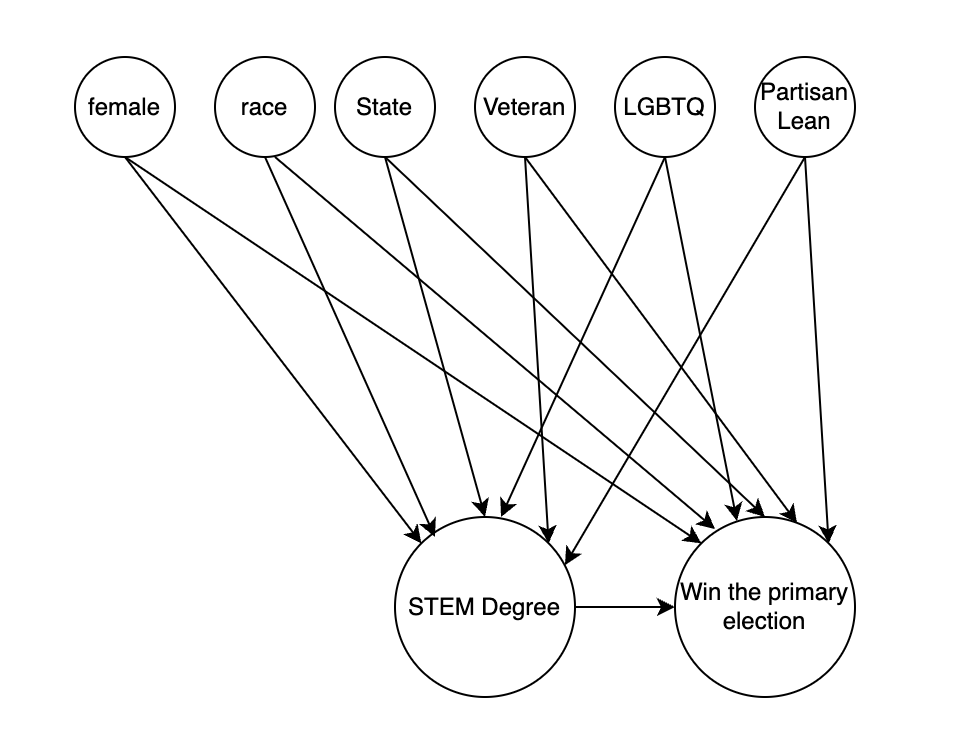

In [ ]:
from IPython import display
display.Image("/work/Screenshot 2023-12-05 at 2.40.04 PM.png")

### Compute the propensity score

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
dem

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Race_bin,Veteran_bin,female_bin,Won Primary_bin,STEM Numeric,latitude,longitude,longitude_jitter,latitude_jitter,Won Primary Jittered
0,Anthony White (Alabama),Alabama,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0.0,1.0,0,0.0,0.0,32.377716,-86.300568,-86.483054,31.723983,0.023032
1,Christopher Countryman,Alabama,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,1.0,0.0,0,0.0,0.0,32.377716,-86.300568,-86.696639,32.210396,-0.006337
2,"Doug ""New Blue"" Smith",Alabama,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,1.0,1.0,0,0.0,0.0,32.377716,-86.300568,-86.089321,31.655066,0.039290
3,James C. Fields,Alabama,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,0.0,1.0,0,0.0,0.0,32.377716,-86.300568,-86.984048,31.704303,0.015735
4,Sue Bell Cobb,Alabama,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,...,1.0,0.0,1,0.0,0.0,32.377716,-86.300568,-86.433581,32.777233,0.047393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,West Virginia,U.S. House West Virginia District 2,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-35.330002,...,1.0,0.0,0,1.0,0.0,38.336246,-81.612328,-81.613247,38.184700,0.967036
807,Janice Hagerman,West Virginia,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,1.0,0.0,0,0.0,0.0,38.336246,-81.612328,-81.198008,39.095605,0.021081
808,Paul Davis,West Virginia,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Lost,None,None,-47.480000,...,1.0,0.0,0,0.0,0.0,38.336246,-81.612328,-81.665264,37.730517,0.029898
809,Richard Ojeda,West Virginia,U.S. House West Virginia District 3,Representative,Regular,5/8/18,Advanced,None,On the Ballot,-47.480000,...,0.0,1.0,0,1.0,0.0,38.336246,-81.612328,-81.503790,38.816743,1.049002


In [ ]:
dem_filter = dem[['Candidate', 'Won Primary_bin', 'STEM Numeric','District', 'Race_bin', 'Veteran_bin', 'LGBTQ?_bin', 'female_bin','Partisan Lean']]
dem_filter = dem_filter.dropna()

In [ ]:
# One hot encode State and District
dem_encoded = pd.get_dummies(dem_filter, columns=['District'], drop_first=True) 

In [ ]:
dem_encoded

,Candidate,Won Primary_bin,STEM Numeric,Race_bin,Veteran_bin,LGBTQ?_bin,female_bin,Partisan Lean,District_Governor of Arkansas,District_Governor of California,...,District_U.S. House Washington District 5,District_U.S. House Washington District 8,District_U.S. House West Virginia District 1,District_U.S. House West Virginia District 2,District_U.S. House West Virginia District 3,District_U.S. Senate Mississippi,District_U.S. Senate Nevada,District_U.S. Senate Tennessee,District_U.S. Senate Texas,District_U.S. Senate Utah
0,Anthony White (Alabama),0.0,0.0,0.0,1.0,0.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,0.0,0.0,1.0,0.0,1.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",0.0,0.0,1.0,1.0,0.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,0.0,0.0,0.0,1.0,0.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,0.0,0.0,1.0,0.0,0.0,1,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,1.0,0.0,1.0,0.0,0.0,0,-35.330002,0,0,...,0,0,0,1,0,0,0,0,0,0
807,Janice Hagerman,0.0,0.0,1.0,0.0,0.0,0,-47.480000,0,0,...,0,0,0,0,1,0,0,0,0,0
808,Paul Davis,0.0,0.0,1.0,0.0,0.0,0,-47.480000,0,0,...,0,0,0,0,1,0,0,0,0,0
809,Richard Ojeda,1.0,0.0,0.0,1.0,0.0,0,-47.480000,0,0,...,0,0,0,0,1,0,0,0,0,0


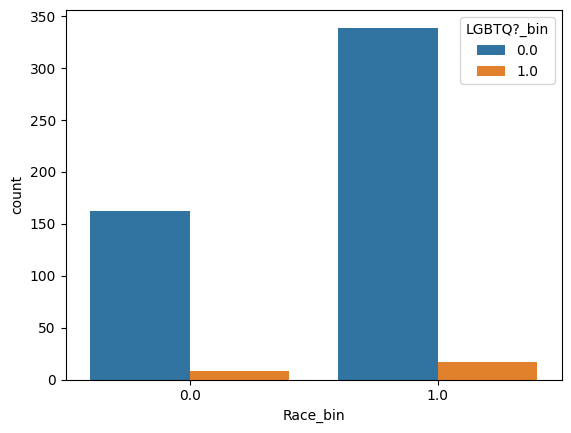

In [ ]:
sns.countplot(data=dem_encoded[dem_encoded['STEM Numeric']==0], 
        x='Race_bin', hue='LGBTQ?_bin');

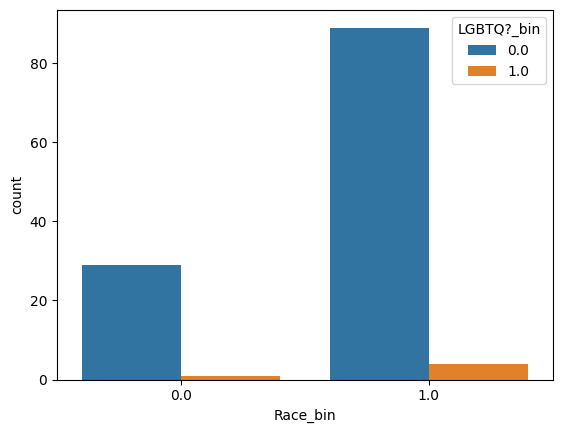

In [ ]:
sns.countplot(data=dem_encoded[dem_encoded['STEM Numeric']==1], 
        x='Race_bin', hue='LGBTQ?_bin');

In [ ]:
dem_encoded.sum()

Candidate                           Anthony White (Alabama)Christopher CountrymanD...
Won Primary_bin                                                                 201.0
STEM Numeric                                                                    123.0
Race_bin                                                                        449.0
Veteran_bin                                                                      98.0
                                                          ...                        
District_U.S. Senate Mississippi                                                    5
District_U.S. Senate Nevada                                                         3
District_U.S. Senate Tennessee                                                      2
District_U.S. Senate Texas                                                          3
District_U.S. Senate Utah                                                           1
Length: 220, dtype: object

In [ ]:
# Confounders: race, Veteran, LGBTQ, is_female, state, district, Partisan Lean
# Treatment
Z = dem_encoded['STEM Numeric']
# Outcome
Y = dem_encoded['Won Primary_bin']
# Confounders
X = dem_encoded.iloc[:,3:]

In [ ]:
X

,Race_bin,Veteran_bin,LGBTQ?_bin,female_bin,Partisan Lean,District_Governor of Arkansas,District_Governor of California,District_Governor of Colorado,District_Governor of Georgia,District_Governor of Idaho,...,District_U.S. House Washington District 5,District_U.S. House Washington District 8,District_U.S. House West Virginia District 1,District_U.S. House West Virginia District 2,District_U.S. House West Virginia District 3,District_U.S. Senate Mississippi,District_U.S. Senate Nevada,District_U.S. Senate Tennessee,District_U.S. Senate Texas,District_U.S. Senate Utah
0,0.0,1.0,0.0,0,-28.879999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0,-28.879999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,0,-28.879999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0,-28.879999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,1,-28.879999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.0,0.0,0.0,0,-35.330002,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
807,1.0,0.0,0.0,0,-47.480000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
808,1.0,0.0,0.0,0,-47.480000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
809,0.0,1.0,0.0,0,-47.480000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X.sum()

Race_bin                             449.00000
Veteran_bin                           98.00000
LGBTQ?_bin                            30.00000
female_bin                           124.00000
Partisan Lean                      -8123.79995
                                       ...    
District_U.S. Senate Mississippi       5.00000
District_U.S. Senate Nevada            3.00000
District_U.S. Senate Tennessee         2.00000
District_U.S. Senate Texas             3.00000
District_U.S. Senate Utah              1.00000
Length: 217, dtype: float64

In [ ]:
import statsmodels.api as sm

In [ ]:
def fit_OLS_model(df, target, inputs, intercept = False):
    # target = df[target_variable] 
    # inputs = df[explanatory_variables] 
    if intercept:
        inputs = sm.add_constant(inputs)
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

def mean_squared_error(true_vals, predicted_vals):
    return np.mean((true_vals - predicted_vals) ** 2)

In [ ]:
dem_encoded

,Candidate,Won Primary_bin,STEM Numeric,Race_bin,Veteran_bin,LGBTQ?_bin,female_bin,Partisan Lean,District_Governor of Arkansas,District_Governor of California,...,District_U.S. House Washington District 5,District_U.S. House Washington District 8,District_U.S. House West Virginia District 1,District_U.S. House West Virginia District 2,District_U.S. House West Virginia District 3,District_U.S. Senate Mississippi,District_U.S. Senate Nevada,District_U.S. Senate Tennessee,District_U.S. Senate Texas,District_U.S. Senate Utah
0,Anthony White (Alabama),0.0,0.0,0.0,1.0,0.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,0.0,0.0,1.0,0.0,1.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",0.0,0.0,1.0,1.0,0.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,0.0,0.0,0.0,1.0,0.0,0,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,0.0,0.0,1.0,0.0,0.0,1,-28.879999,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Talley Sergent,1.0,0.0,1.0,0.0,0.0,0,-35.330002,0,0,...,0,0,0,1,0,0,0,0,0,0
807,Janice Hagerman,0.0,0.0,1.0,0.0,0.0,0,-47.480000,0,0,...,0,0,0,0,1,0,0,0,0,0
808,Paul Davis,0.0,0.0,1.0,0.0,0.0,0,-47.480000,0,0,...,0,0,0,0,1,0,0,0,0,0
809,Richard Ojeda,1.0,0.0,0.0,1.0,0.0,0,-47.480000,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
M = dem_encoded.iloc[:,2:-1]

In [ ]:
full_linear_model = fit_OLS_model(dem_encoded, Y, M)
print(full_linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Won Primary_bin   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.224
Method:                 Least Squares   F-statistic:                              1.866
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    2.51e-08
Time:                        22:53:21   Log-Likelihood:                         -327.05
No. Observations:                 649   AIC:                                      1086.
Df Residuals:                     433   BIC:                                      2053.
Df Model:                         216                                                  
Covariance Type:            nonrobust                                                  
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
corr_matrix = M.corr()
# Find pairs with a correlation above 0.1 (absolute value)
high_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort")
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs) > 0.1]
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Remove self-correlation (correlation of 1)

# Remove duplicate pairs
high_corr_pairs = high_corr_pairs.drop_duplicates()

print(high_corr_pairs)

Race_bin                                       Partisan Lean                                 -0.284305
District_U.S. House Texas District 29          Race_bin                                      -0.156455
female_bin                                     Veteran_bin                                   -0.150228
District_U.S. House Michigan District 13       Race_bin                                      -0.133252
Race_bin                                       District_U.S. House Texas District 22         -0.132023
                                               District_U.S. House Texas District 23         -0.132023
Partisan Lean                                  District_U.S. House Alabama District 4        -0.125876
District_U.S. House Kentucky District 5        Partisan Lean                                 -0.124817
District_U.S. House West Virginia District 3   Partisan Lean                                 -0.124763
District_U.S. House Texas District 11          Partisan Lean             

### Inverse Propensity Weighting or Matching

In [ ]:
lr = LR(penalty = 'none', max_iter=200, solver='lbfgs', random_state=0)
lr.fit(X,Z)

/shared-libs/python3.10/py/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, penalty='none', random_state=0)

In [ ]:
# Compute propensity score
e_hat = lr.predict_proba(X)[:, 1]
e_hat

array([7.46540730e-03, 6.58505090e-03, 5.12842348e-03, 7.46540730e-03,
       3.44708508e-03, 4.78357618e-03, 4.43254233e-01, 5.42644321e-01,
       1.93532686e-04, 1.23683558e-04, 5.56764253e-01, 4.62621523e-01,
       9.25062460e-05, 9.92087192e-05, 6.02812290e-04, 5.05577993e-04,
       4.98061714e-01, 5.10268266e-01, 1.00302904e-03, 2.30486325e-05,
       2.47187290e-05, 3.36303639e-05, 2.30486325e-05, 6.04858723e-04,
       4.61228965e-04, 5.18184645e-01, 4.50209883e-01, 3.82819323e-01,
       3.13140945e-01, 3.08615458e-01, 3.82819323e-01, 2.34255955e-01,
       2.98294581e-01, 3.82819323e-01, 3.82819323e-01, 3.82819323e-01,
       2.98294581e-01, 2.98294581e-01, 2.98294581e-01, 1.10413415e-05,
       1.53427601e-05, 1.10413415e-05, 1.10413415e-05, 6.31748357e-01,
       7.04480555e-01, 7.04480555e-01, 7.18833459e-01, 6.31748357e-01,
       7.14544293e-01, 9.95942682e-01, 3.18918087e-01, 3.18918087e-01,
       3.18918087e-01, 3.93011754e-05, 2.82830866e-05, 2.82830866e-05,
      

In [ ]:
dem_encoded['propensity_score'] = e_hat
dem_trimmed = dem_encoded[(dem_encoded['propensity_score'] > 0.1) & (dem_encoded['propensity_score'] < 0.9)]
print(len(dem_encoded))
print(len(dem_trimmed))

649
307


In [ ]:
n = len(dem_trimmed)
e = dem_trimmed['propensity_score']
y = Y
treat = Z == 1
ipw_estimate = ( np.sum(y[treat] / e[treat])/n ) - ( np.sum(y[~treat] / (1-e[~treat]))/n )
ipw_estimate

-0.15807173982012832

### Results

Our analysis aimed to estimate the causal effect of holding a STEM degree on the likelihood of winning a primary election within the Democratic Party. We employed Inverse Propensity Score Weighting (IPW) to address confounding variables. The estimated propensity scores ranged mostly between 0.1 and 0.2 after excluding state and district as confounders due to overfitting concerns. Our initial IPW estimate suggests that having a STEM degree is associated with an 11 percentage point decrease in the probability of winning the primary. This estimate points to a negative causal relationship between having a STEM degree and primary election success within the scope of the observed confounders.

It is important to note that this result is subject to our assumption of unconfoundedness, which holds that all the confounders influencing both the treatment and the outcome have been accounted for in our model. Given the limitations of our current dataset, we have included gender, race, veteran status, LGBTQ status, and partisan lean as confounders. Geographic location was initially considered but led to model overfitting and hence was excluded from this analysis. We acknowledge that important financial variables such as campaign funding and individual financial resources, which are suspected to influence both the possession of a STEM degree and electoral success, have not yet been included due to data limitations. Their absence poses a limitation to the current analysis and might be addressed before our final submission.

The results are tentative and may be updated with the inclusion of additional data. The effect size of -0.11 is substantial, considering the scale of election outcomes. However, the uncertainty surrounding our estimate remains high due to potential unobserved confounding. Therefore, we interpret these findings cautiously, recognizing the need for further data collection and analysis to confirm these preliminary conclusions. We encourage a reevaluation of these results upon the inclusion of financial variables to ensure a comprehensive assessment of the causal effect of STEM degrees on primary election outcomes.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=690ae071-0a20-4f1c-a62a-964deb259c61' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>